# DEPLOYMENT

**Welcome to deployment section! In this section of the course, we will go through the entire deployment process, starting as if you had to create a servicable model from scratch, then deploy it for others to use, either through API or a web form.**

# Data

For this example we use the wine quality data set: [wine dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/), which is about the quality of red and white wine. 

From UCI Machine Learning:
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.

The data set consists of over 6,000 combines samples of white and red wine. 13 features were measured from each sample: fixed acidity, volatile acidity, citric acide, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, and color. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
wine = pd.read_csv("data/winedata.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## Data Processing

### Features and Target

In [4]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [5]:
X = wine.drop('color',axis=1)
y = wine['color']

In [6]:
wine['color'].unique()

array(['white', 'red'], dtype=object)

In [7]:
# Lots of ways to one hot encode
# https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
# https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [8]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
scaled_X_train = scaler.transform(X_train)

In [14]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(units=12,activation='relu',input_shape=[12,]))

# Last layer for multi-class classification of 2 colors
model.add(Dense(units=2,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(patience=10)

In [19]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Train on 5197 samples, validate on 1300 samples
Epoch 1/300
5197/5197 [==============================] - 1s 99us/sample - loss: 0.5545 - accuracy: 0.7377 - val_loss: 0.4493 - val_accuracy: 0.7654
Epoch 2/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.3740 - accuracy: 0.8297 - val_loss: 0.2926 - val_accuracy: 0.8923
Epoch 3/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.2323 - accuracy: 0.9486 - val_loss: 0.1802 - val_accuracy: 0.9623
Epoch 4/300
5197/5197 [==============================] - 0s 37us/sample - loss: 0.1485 - accuracy: 0.9754 - val_loss: 0.1253 - val_accuracy: 0.9746
Epoch 5/300
5197/5197 [==============================] - 0s 36us/sample - loss: 0.1105 - accuracy: 0.9792 - val_loss: 0.0973 - val_accuracy: 0.9792
Epoch 6/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0906 - accuracy: 0.9823 - val_loss: 0.0814 - val_accuracy: 0.9808
Epoch 7/300
5197/5197 [==============================] - 0s 35us

Epoch 56/300
5197/5197 [==============================] - 0s 38us/sample - loss: 0.0341 - accuracy: 0.9911 - val_loss: 0.0290 - val_accuracy: 0.9923
Epoch 57/300
5197/5197 [==============================] - 0s 36us/sample - loss: 0.0339 - accuracy: 0.9908 - val_loss: 0.0291 - val_accuracy: 0.9915
Epoch 58/300
5197/5197 [==============================] - 0s 36us/sample - loss: 0.0340 - accuracy: 0.9911 - val_loss: 0.0304 - val_accuracy: 0.9908
Epoch 59/300
5197/5197 [==============================] - 0s 37us/sample - loss: 0.0338 - accuracy: 0.9911 - val_loss: 0.0285 - val_accuracy: 0.9923
Epoch 60/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0334 - accuracy: 0.9913 - val_loss: 0.0283 - val_accuracy: 0.9923
Epoch 61/300
5197/5197 [==============================] - 0s 36us/sample - loss: 0.0333 - accuracy: 0.9911 - val_loss: 0.0287 - val_accuracy: 0.9923
Epoch 62/300
5197/5197 [==============================] - 0s 39us/sample - loss: 0.0333 - accuracy: 0.9908

Epoch 111/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0269 - accuracy: 0.9935 - val_loss: 0.0241 - val_accuracy: 0.9931
Epoch 112/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0266 - accuracy: 0.9933 - val_loss: 0.0251 - val_accuracy: 0.9915
Epoch 113/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0265 - accuracy: 0.9937 - val_loss: 0.0241 - val_accuracy: 0.9931
Epoch 114/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0264 - accuracy: 0.9940 - val_loss: 0.0241 - val_accuracy: 0.9946
Epoch 115/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0262 - accuracy: 0.9933 - val_loss: 0.0242 - val_accuracy: 0.9931
Epoch 116/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0261 - accuracy: 0.9940 - val_loss: 0.0239 - val_accuracy: 0.9931
Epoch 117/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0262 - accuracy:

5197/5197 [==============================] - 0s 35us/sample - loss: 0.0224 - accuracy: 0.9960 - val_loss: 0.0224 - val_accuracy: 0.9946
Epoch 166/300
5197/5197 [==============================] - 0s 36us/sample - loss: 0.0223 - accuracy: 0.9954 - val_loss: 0.0214 - val_accuracy: 0.9946
Epoch 167/300
5197/5197 [==============================] - 0s 37us/sample - loss: 0.0225 - accuracy: 0.9954 - val_loss: 0.0214 - val_accuracy: 0.9946
Epoch 168/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0224 - accuracy: 0.9958 - val_loss: 0.0214 - val_accuracy: 0.9946
Epoch 169/300
5197/5197 [==============================] - 0s 38us/sample - loss: 0.0222 - accuracy: 0.9960 - val_loss: 0.0210 - val_accuracy: 0.9946
Epoch 170/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0223 - accuracy: 0.9962 - val_loss: 0.0215 - val_accuracy: 0.9938
Epoch 171/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0221 - accuracy: 0.9956 - val_

5197/5197 [==============================] - 0s 34us/sample - loss: 0.0201 - accuracy: 0.9962 - val_loss: 0.0197 - val_accuracy: 0.9946
Epoch 220/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0203 - accuracy: 0.9962 - val_loss: 0.0197 - val_accuracy: 0.9946
Epoch 221/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0198 - accuracy: 0.9965 - val_loss: 0.0198 - val_accuracy: 0.9954
Epoch 222/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0200 - accuracy: 0.9960 - val_loss: 0.0196 - val_accuracy: 0.9946
Epoch 223/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0199 - accuracy: 0.9960 - val_loss: 0.0196 - val_accuracy: 0.9954
Epoch 224/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0200 - accuracy: 0.9960 - val_loss: 0.0195 - val_accuracy: 0.9946
Epoch 225/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0200 - accuracy: 0.9960 - val_

Epoch 274/300
5197/5197 [==============================] - 0s 39us/sample - loss: 0.0186 - accuracy: 0.9962 - val_loss: 0.0190 - val_accuracy: 0.9954
Epoch 275/300
5197/5197 [==============================] - 0s 38us/sample - loss: 0.0185 - accuracy: 0.9962 - val_loss: 0.0191 - val_accuracy: 0.9954
Epoch 276/300
5197/5197 [==============================] - 0s 38us/sample - loss: 0.0189 - accuracy: 0.9960 - val_loss: 0.0190 - val_accuracy: 0.9954
Epoch 277/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0185 - accuracy: 0.9962 - val_loss: 0.0187 - val_accuracy: 0.9954


###### Model Evaluation

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.554537,0.737733,0.449349,0.765385
1,0.374026,0.829709,0.292592,0.892308
2,0.232251,0.948624,0.180227,0.962308
3,0.148462,0.975370,0.125253,0.974615
4,0.110546,0.979219,0.097304,0.979231
...,...,...,...,...
272,0.018833,0.995959,0.018851,0.995385
273,0.018616,0.996152,0.018960,0.995385
274,0.018459,0.996152,0.019090,0.995385
275,0.018864,0.995959,0.018976,0.995385


<AxesSubplot:>

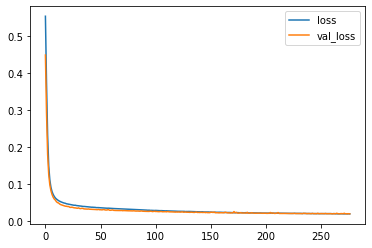

In [22]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

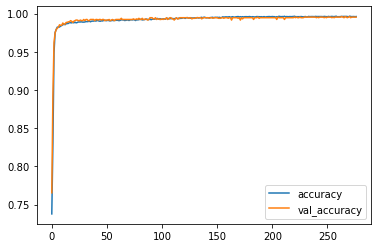

In [23]:
metrics[['accuracy','val_accuracy']].plot()

In [24]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.018715800327750352, 0.99538463]

## Ready Model for Deployment

In [25]:
epochs = len(metrics)

In [26]:
scaled_X = scaler.fit_transform(X)

In [27]:
model = Sequential()
model.add(Dense(units=12,activation='relu'))

# Last layer for multi-class classification of 2 colors
model.add(Dense(units=2,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(scaled_X,y,epochs=epochs)

Train on 6497 samples
Epoch 1/277
6497/6497 [==============================] - 0s 69us/sample - loss: 0.5443 - accuracy: 0.7530
Epoch 2/277
6497/6497 [==============================] - 0s 31us/sample - loss: 0.3552 - accuracy: 0.8330
Epoch 3/277
6497/6497 [==============================] - 0s 30us/sample - loss: 0.2028 - accuracy: 0.9614
Epoch 4/277
6497/6497 [==============================] - 0s 29us/sample - loss: 0.1314 - accuracy: 0.9758
Epoch 5/277
6497/6497 [==============================] - 0s 29us/sample - loss: 0.0989 - accuracy: 0.9803
Epoch 6/277
6497/6497 [==============================] - 0s 29us/sample - loss: 0.0816 - accuracy: 0.9823
Epoch 7/277
6497/6497 [==============================] - 0s 30us/sample - loss: 0.0718 - accuracy: 0.9828
Epoch 8/277
6497/6497 [==============================] - 0s 29us/sample - loss: 0.0651 - accuracy: 0.9831
Epoch 9/277
6497/6497 [==============================] - ETA: 0s - loss: 0.0613 - accuracy: 0.98 - 0s 30us/sample - loss: 0.0608 -

6497/6497 [==============================] - 0s 29us/sample - loss: 0.0287 - accuracy: 0.9937
Epoch 77/277
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0290 - accuracy: 0.9929
Epoch 78/277
6497/6497 [==============================] - 0s 29us/sample - loss: 0.0284 - accuracy: 0.9937
Epoch 79/277
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0281 - accuracy: 0.9937
Epoch 80/277
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0281 - accuracy: 0.9935
Epoch 81/277
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0280 - accuracy: 0.9932
Epoch 82/277
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0277 - accuracy: 0.9938
Epoch 83/277
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0279 - accuracy: 0.9935
Epoch 84/277
6497/6497 [==============================] - 0s 30us/sample - loss: 0.0274 - accuracy: 0.9942
Epoch 85/277
6497/6497 [==========================

6497/6497 [==============================] - 0s 33us/sample - loss: 0.0195 - accuracy: 0.9960
Epoch 153/277
6497/6497 [==============================] - 0s 31us/sample - loss: 0.0194 - accuracy: 0.9960
Epoch 154/277
6497/6497 [==============================] - 0s 31us/sample - loss: 0.0193 - accuracy: 0.9960
Epoch 155/277
6497/6497 [==============================] - 0s 32us/sample - loss: 0.0189 - accuracy: 0.9960
Epoch 156/277
6497/6497 [==============================] - 0s 31us/sample - loss: 0.0192 - accuracy: 0.9962
Epoch 157/277
6497/6497 [==============================] - 0s 32us/sample - loss: 0.0189 - accuracy: 0.9960
Epoch 158/277
6497/6497 [==============================] - 0s 32us/sample - loss: 0.0188 - accuracy: 0.9962
Epoch 159/277
6497/6497 [==============================] - 0s 32us/sample - loss: 0.0189 - accuracy: 0.9958
Epoch 160/277
6497/6497 [==============================] - 0s 33us/sample - loss: 0.0190 - accuracy: 0.9963
Epoch 161/277
6497/6497 [=================

6497/6497 [==============================] - 0s 30us/sample - loss: 0.0164 - accuracy: 0.9962
Epoch 227/277
6497/6497 [==============================] - 0s 30us/sample - loss: 0.0161 - accuracy: 0.9962s - loss: 0.0110 - accuracy: 
Epoch 228/277
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0164 - accuracy: 0.9962
Epoch 229/277
6497/6497 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.99 - 0s 29us/sample - loss: 0.0161 - accuracy: 0.9962
Epoch 230/277
6497/6497 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.99 - 0s 28us/sample - loss: 0.0164 - accuracy: 0.9963
Epoch 231/277
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0161 - accuracy: 0.9962
Epoch 232/277
6497/6497 [==============================] - 0s 29us/sample - loss: 0.0165 - accuracy: 0.9963
Epoch 233/277
6497/6497 [==============================] - 0s 29us/sample - loss: 0.0161 - accuracy: 0.9963
Epoch 234/277
6497/6497 [============

In [29]:
model.save("final_wine_model.h5")

### Saving Scaler

In [30]:
import joblib

In [31]:
joblib.dump(scaler,'wine_scaler.pkl')

['wine_scaler.pkl']

## Predicting a Single New Wine Color

In [32]:
from tensorflow.keras.models import load_model

In [33]:
wine_model = load_model("final_wine_model.h5")
wine_scaler = joblib.load("wine_scaler.pkl")

In [34]:
wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white


In [35]:
wine_example = {'fixed_acidity':7.2,
                 'volatile_acidity':0.66,
                 'citric_acid':0.33,
                 'residual_sugar':2.5,
                 'chlorides':0.068,
                 'free_sulfur_dioxide':34.0,
                 'total_sulfur_dioxide':102.0,
                 'density':0.99,
                 'pH':3.27,
                 'sulphates':0.78,
                 'alcohol':12.8,
                 'quality':6}

In [36]:
wine_example.keys()

dict_keys(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])

In [37]:
encoder.classes_

array(['red', 'white'], dtype='<U5')

In [38]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    f_a = sample_json['fixed_acidity']
    v_a = sample_json['volatile_acidity']
    c_a = sample_json['citric_acid']
    r_s = sample_json['residual_sugar']
    chl = sample_json['chlorides']
    f_s_d = sample_json['free_sulfur_dioxide']
    t_s_d = sample_json['total_sulfur_dioxide']
    den = sample_json['density']
    ph = sample_json['pH']
    sul = sample_json['sulphates']
    alc = sample_json['alcohol']
    qua = sample_json['quality']
    
    wine = [[f_a,v_a,c_a,r_s,chl,f_s_d,t_s_d,den,ph,sul,alc,qua]]
    
    wine = scaler.transform(wine)
    
    classes = np.array(['red', 'white'])
    
    class_ind = model.predict_classes(wine)
    
    return classes[class_ind][0]
                    

In [39]:
return_prediction(wine_model,wine_scaler,wine_example)

'white'

# CODE FOR DEPLOYMENT: START HERE! 5/5

In [40]:
from tensorflow.keras.models import load_model
import joblib


wine_model = load_model("final_wine_model.h5")
wine_scaler = joblib.load("wine_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    f_a = sample_json['fixed_acidity']
    v_a = sample_json['volatile_acidity']
    c_a = sample_json['citric_acid']
    r_s = sample_json['residual_sugar']
    chl = sample_json['chlorides']
    f_s_d = sample_json['free_sulfur_dioxide']
    t_s_d = sample_json['total_sulfur_dioxide']
    den = sample_json['density']
    ph = sample_json['pH']
    sul = sample_json['sulphates']
    alc = sample_json['alcohol']
    qua = sample_json['quality']
    
    wine = [[f_a,v_a,c_a,r_s,chl,f_s_d,t_s_d,den,ph,sul,alc,qua]]
    
    wine = scaler.transform(wine)
    
    classes = np.array(['red', 'white'])
    
    class_ind = model.predict_classes(wine)
    
    return classes[class_ind][0]
    

In [41]:
wine_example = {
    "fixed_acidity":7.2,
    "volatile_acidity":0.66,
    "citric_acid":0.33,
    "residual_sugar":2.5,
    "chlorides":0.068,
    "free_sulfur_dioxide":34.0,
    "total_sulfur_dioxide":102.0,
    "density":0.99,
    "pH":3.27,
    "sulphates":0.78,
    "alcohol":12.8,
    "quality":6
    }